# debugging notebook

Leanne Friedrich 7/31/23: For debugging individual files

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
from py.full_sequence import SDTWorkflow, fullSequencer
LOGGERDEFINED = logs.openLog('debug.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# single folder

In [3]:
folder2 = os.path.join(cfg.path.server, r'SDT\SO_S85-0.05\I_SO10-S85-0.05_S_4.00\I_SO10-S85-0.05_S_4.00_230516\disturbXS2_2_+z_1.250')
sw = SDTWorkflow(folder2)
sw.run(progDimsK={'overwrite':False, 'getBlips':True})

In [4]:
sw.putStillsAway()

FileNotFoundError: [WinError 3] The system cannot find the path specified: '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\PDMSS_vsweep\\I_PDMSS8-S85-0.05_S_3.50\\I_PDMSS8-S85-0.05_S_3.50_vsweep_231019\\disturbUnder_1_0.500_VF_10.00_VS_4.44\\disturbUnder_1_0.500_VF_10.00_VS_4.44_Basler camera_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_140016_7.png' -> '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\PDMSS_vsweep\\I_PDMSS8-S85-0.05_S_3.50\\I_PDMSS8-S85-0.05_S_3.50_vsweep_231019\\disturbUnder_1_0.500_VF_10.00_VS_4.44\\raw\\disturbUnder_1_0.500_VF_10.00_VS_4.44_Basler camera_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_140016_7.png'

In [43]:
sw.pdim.exportAll(diag=2, getBlips=True, overwrite=True)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_4.44\disturbUnder_1_0.500_VF_10.00_VS_4.44_timeRewrite_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_140015_1.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_4.44\disturbUnder_1_0.500_VF_10.00_VS_4.44_flagFlip_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_140015_1.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_4.44\disturbUnder_1_0.500_VF_10.00_VS_4.44_progPos_I_PDMSS8-S85-0.05_S_3.50_vsweep_231019_140015_1.csv
0.9049525894704037 0.5 0.45247629473520184
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_vsweep\8_3.50\vsweep_231019\disturbUnder_1_0.500_VF_10.00_VS_4.44\disturbUnder_1_0.500_VF_10.00_VS_4.44_progDims_I_P

In [197]:
sw.exportStills(overwrite=False, dstart_manual=2)

INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1p1_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1p2_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1p3_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1p4_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1p5_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1o1_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1o2_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1o3_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1o4_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Exported disturbUnder_1_0.750_vstill_HIh1_l0w1o5_I_PDMSS7-S20-0.5_S_3.00_230922_132728_4.png
INFO: Expo

INFO: Exported //resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbXS2_2_+z_0.500\disturbXS2_2_+z_0.500_nozDims_I_SO7-S20-0.5_S_4.00_230509_183019_0.csv


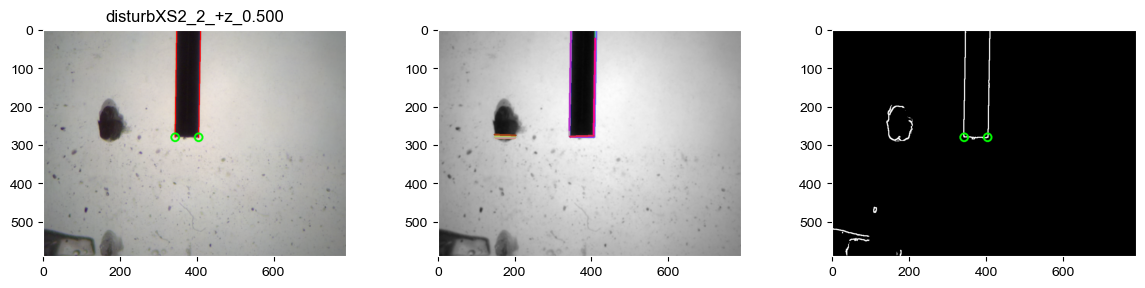

In [190]:
sw.detectNozzle(overwrite=True, diag=3, bgmode=0, modes=[0], frameGetMode=1)

In [1866]:
sw.adjustNozzle()

INFO: Exported //resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\PDMSS\I_PDMSS12.5_S_4.00\I_PDMSS12.5_S_4.00_230808\disturbVert2_2_1.250\disturbVert2_2_1.250_background_I_PDMSS12.5_S_4.00_230808_101120_3.png


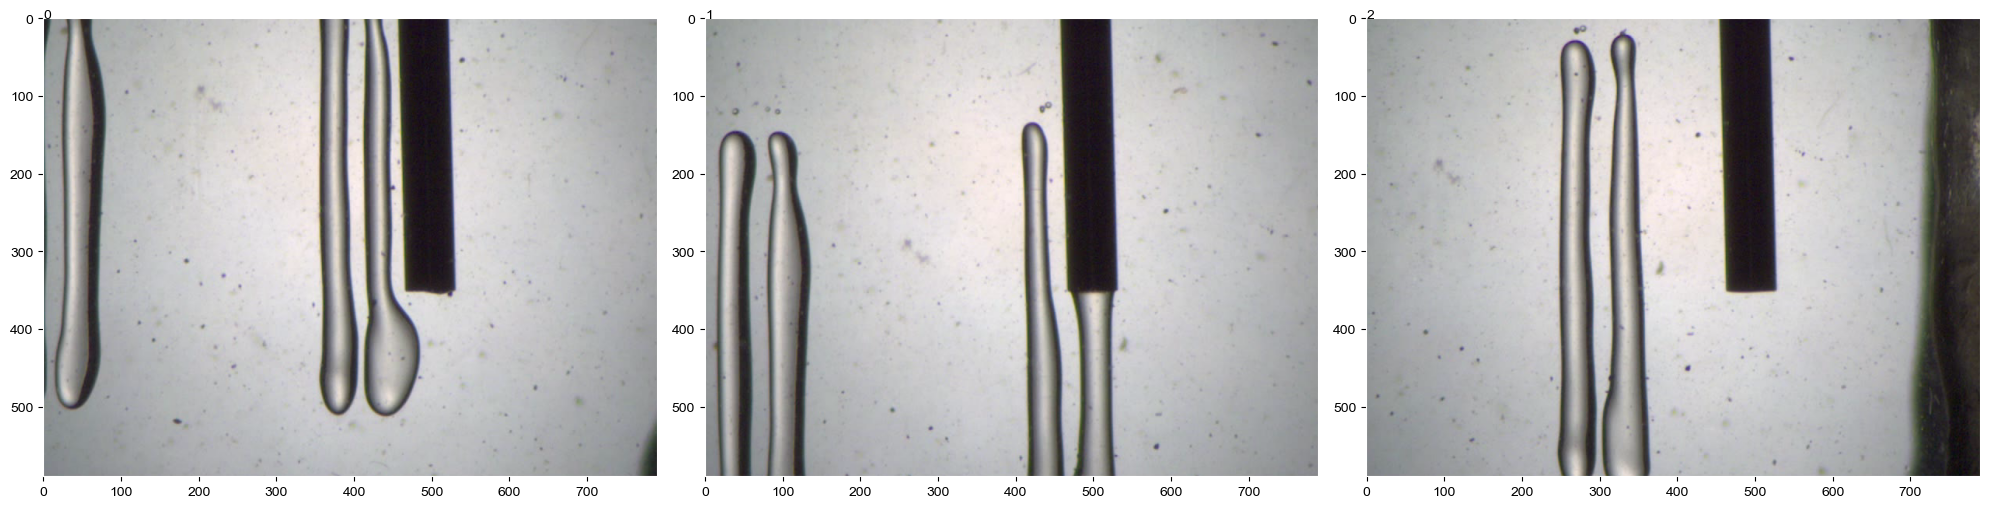

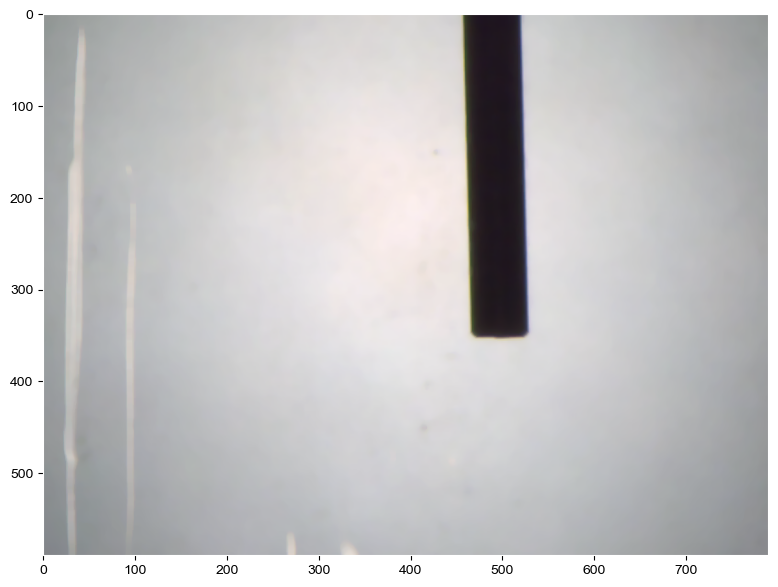

In [15]:
sw.exportBackground(overwrite=True, diag=2, ymin=10, curveFit=False, numpics=3, mode=2, frameGetMode=1)

In [69]:
sw.showFailures()

,file,error
0,successes,
1,l0w1p1,no vals detected
2,l0w1p2,no vals detected
3,l0w1p3,no vals detected
4,l1w1p1,no vals detected
5,l1w1p2,no vals detected
6,l1w1p3,no vals detected
7,l2w1p1,no vals detected
8,l2w1p2,no vals detected
9,l2w1p3,no vals detected


,line,usedML


disturbHoriz3_3_0.750_vstill_HOh3_l3w1p1_I_SO7-S20-0.5_S_4.00_230509_184700_6.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_3_0.750\disturbHoriz3_3_0.750_cropLocs_I_SO7-S20-0.5_S_4.00_230509_184700_6.csv
INFO: Exported disturbHoriz3_3_0.750_Usegment_HOh3_l3w1p1_I_SO7-S20-0.5_S_4.00_230509_184700_6.png


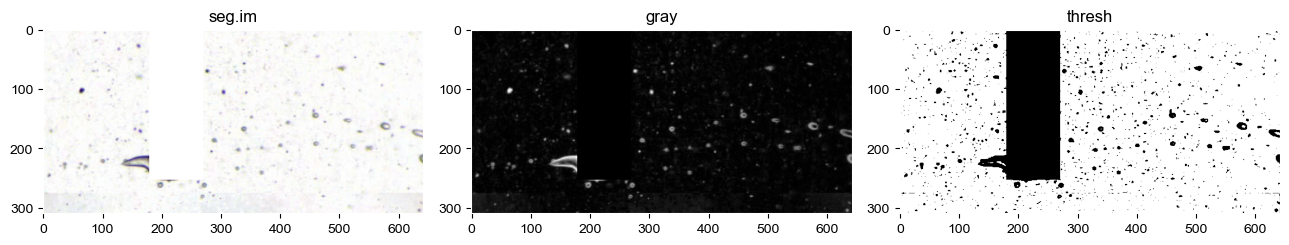

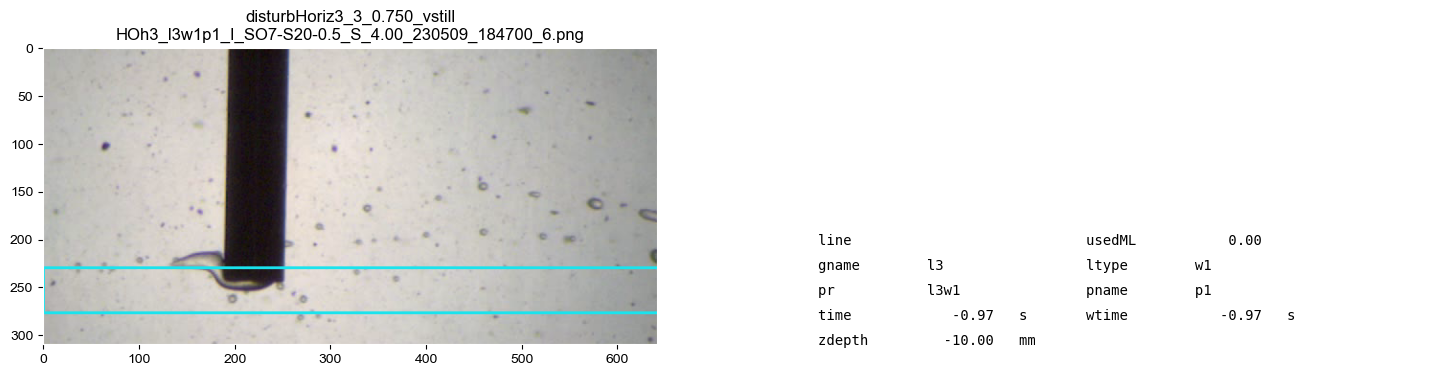

In [574]:
newcl = False
sw.testFailure(4, diag=1,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

In [186]:
np.pi*(0.55/2)**2

0.23758294442772815

Usegment: True, MLsegment: False
INFO: Threshold: 130, product: 54.54013513513514, white:80


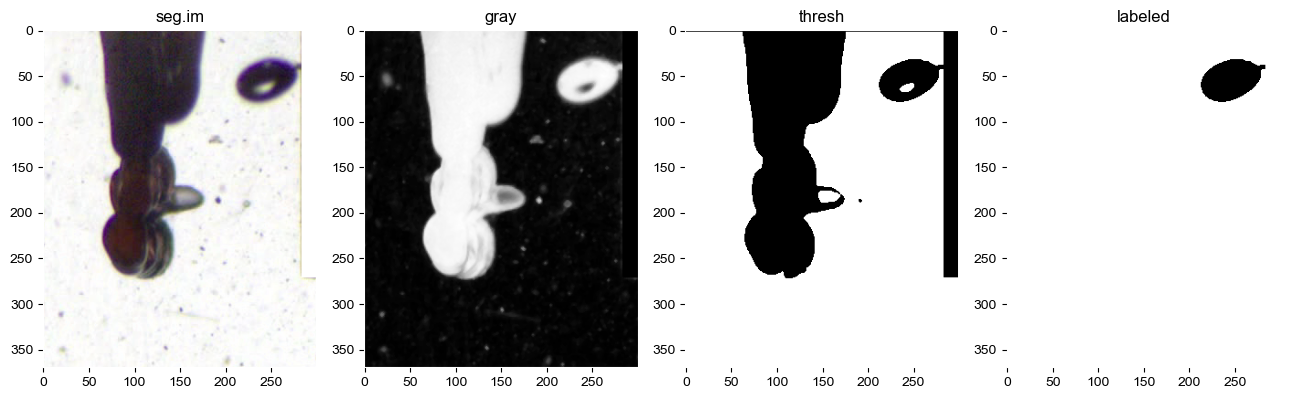

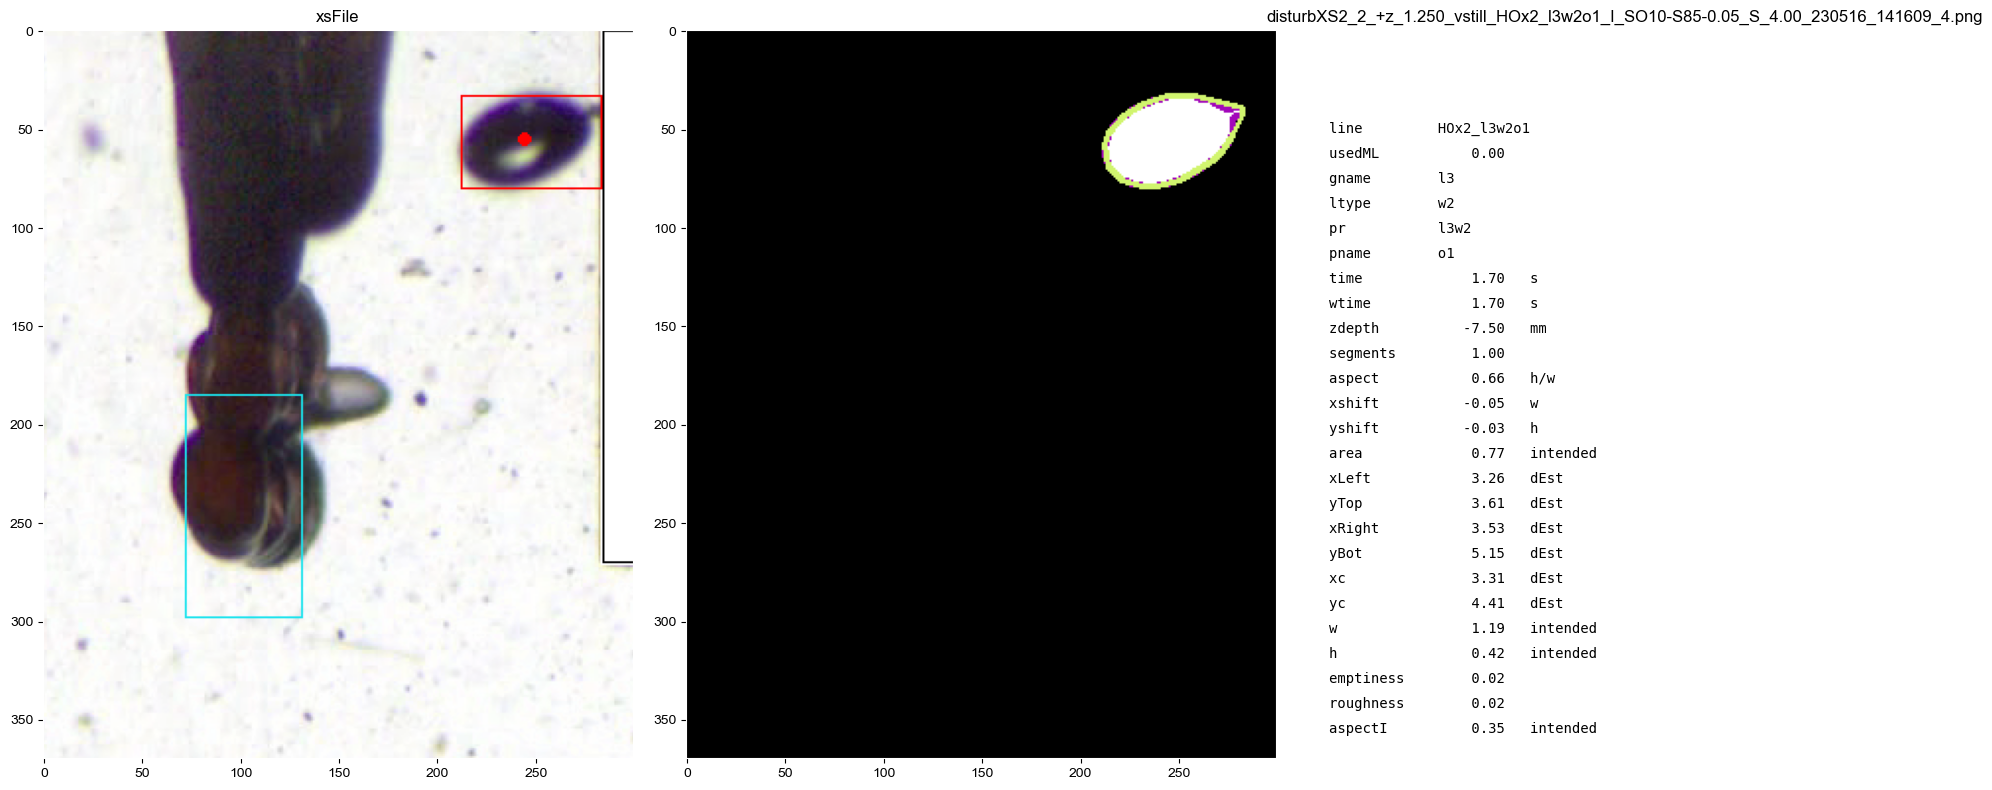

In [8]:
newcl = False
tag = 'l3w2o1'
if len(tag)==6:
    diag = 2
else:
    diag = 0
sw.testImage(tag, diag=diag,  overrideSegment=False, useML=False
             , overwriteCropLocs=newcl, exportCropLocs=newcl, topthresh=230, acrit=500)

INFO: Exported disturbUnder_3_1.250_ldiff_HIh3_l1w2o2_I_PDMSS7.5_S_3.00_230920_114443_4.png


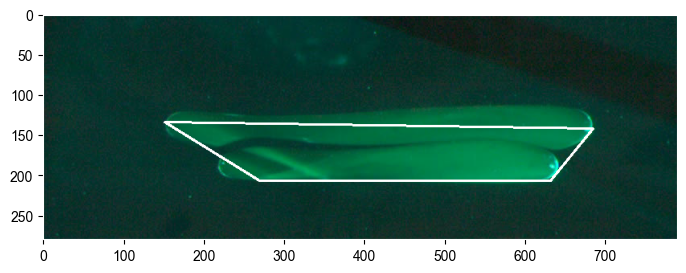

In [18]:
sw.vs[tag].ldiffIm(export=True, display=True);

In [41]:
sw.openLastImage()

In [17]:
sw.openLastSeries(nmax=8, scrollRight=False, dropper=False, scrollDown=False)

In [9]:
sw.whiteOutLast()

INFO: Whited out \SDT\SO_S85-0.05\I_SO10-S85-0.05_S_4.00\I_SO10-S85-0.05_S_4.00_230516\disturbXS2_2_+z_1.250\disturbXS2_2_+z_1.250_vstill_HOx2_l3w2o1_I_SO10-S85-0.05_S_4.00_230516_141609_4.png
INFO: Blacked out \SDT\SO_S85-0.05\I_SO10-S85-0.05_S_4.00\I_SO10-S85-0.05_S_4.00_230516\disturbXS2_2_+z_1.250\Usegment\disturbXS2_2_+z_1.250_Usegment_HOx2_l3w2o1_I_SO10-S85-0.05_S_4.00_230516_141609_4.png


In [1823]:
sw.whiteOutFiles(canMatch=['_l1d2o'])

INFO: Whited out \SDT\PDMSS_S20_0.5\I_PDMSS9-S20-0.5_S_4.00\I_PDMSS9-S20-0.5_S_4.00_230922\disturbUnder_2_1.000\disturbUnder_2_1.000_vstill_HIh2_l1d2o1_I_PDMSS9-S20-0.5_S_4.00_230922_163443_8.png
INFO: Blacked out \SDT\PDMSS_S20_0.5\I_PDMSS9-S20-0.5_S_4.00\I_PDMSS9-S20-0.5_S_4.00_230922\disturbUnder_2_1.000\Usegment\disturbUnder_2_1.000_Usegment_HIh2_l1d2o1_I_PDMSS9-S20-0.5_S_4.00_230922_163443_8.png
INFO: Whited out \SDT\PDMSS_S20_0.5\I_PDMSS9-S20-0.5_S_4.00\I_PDMSS9-S20-0.5_S_4.00_230922\disturbUnder_2_1.000\disturbUnder_2_1.000_vstill_HIh2_l1d2o2_I_PDMSS9-S20-0.5_S_4.00_230922_163443_8.png
INFO: Blacked out \SDT\PDMSS_S20_0.5\I_PDMSS9-S20-0.5_S_4.00\I_PDMSS9-S20-0.5_S_4.00_230922\disturbUnder_2_1.000\Usegment\disturbUnder_2_1.000_Usegment_HIh2_l1d2o2_I_PDMSS9-S20-0.5_S_4.00_230922_163443_8.png
INFO: Whited out \SDT\PDMSS_S20_0.5\I_PDMSS9-S20-0.5_S_4.00\I_PDMSS9-S20-0.5_S_4.00_230922\disturbUnder_2_1.000\disturbUnder_2_1.000_vstill_HIh2_l1d2o3_I_PDMSS9-S20-0.5_S_4.00_230922_163443_8.

In [10]:
sw.analyze(overwriteMeasure=True, overwriteSummary=True, useML=False, acrit=100)

INFO: Exported //resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\SO_S85-0.05\I_SO10-S85-0.05_S_4.00\I_SO10-S85-0.05_S_4.00_230516\disturbXS2_2_+z_1.250\disturbXS2_2_+z_1.250_failures_I_SO10-S85-0.05_S_4.00_230516_141609_4.csv
INFO: Exported //resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\SO_S85-0.05\I_SO10-S85-0.05_S_4.00\I_SO10-S85-0.05_S_4.00_230516\disturbXS2_2_+z_1.250\disturbXS2_2_+z_1.250_measure_I_SO10-S85-0.05_S_4.00_230516_141609_4.csv
INFO: Exported //resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\SO_S85-0.05\I_SO10-S85-0.05_S_4.00\I_SO10-S85-0.05_S_4.00_230516\disturbXS2_2_+z_1.250\disturbXS2_2_+z_1.250_summary_I_SO10-S85-0.05_S_4.00_230516_141609_4.csv


In [129]:
sw.analyze(overwriteMeasure=True, overwriteSummary=True, overrideSegment=True, overwriteCropLocs=True, useML=False, acrit=500)

INFO: Exported disturbXS2_1_+z_0.750_Usegment_HOx1_l0d1o1_I_SO7-S20-0.5_S_3.50_230509_150100_0.png
INFO: Exported disturbXS2_1_+z_0.750_Usegment_HOx1_l0d1o2_I_SO7-S20-0.5_S_3.50_230509_150100_0.png
INFO: Exported disturbXS2_1_+z_0.750_Usegment_HOx1_l0d1_I_SO7-S20-0.5_S_3.50_230509_150100_0.png
INFO: Exported disturbXS2_1_+z_0.750_Usegment_HOx1_l0w1o1_I_SO7-S20-0.5_S_3.50_230509_150100_0.png
INFO: Exported disturbXS2_1_+z_0.750_Usegment_HOx1_l0w1o2_I_SO7-S20-0.5_S_3.50_230509_150100_0.png
INFO: Exported disturbXS2_1_+z_0.750_Usegment_HOx1_l0w1_I_SO7-S20-0.5_S_3.50_230509_150100_0.png
INFO: Exported disturbXS2_1_+z_0.750_Usegment_HOx1_l1d1o1_I_SO7-S20-0.5_S_3.50_230509_150100_0.png
INFO: Exported disturbXS2_1_+z_0.750_Usegment_HOx1_l1d1o2_I_SO7-S20-0.5_S_3.50_230509_150100_0.png
INFO: Exported disturbXS2_1_+z_0.750_Usegment_HOx1_l1d1_I_SO7-S20-0.5_S_3.50_230509_150100_0.png
INFO: Exported disturbXS2_1_+z_0.750_Usegment_HOx1_l1w1o1_I_SO7-S20-0.5_S_3.50_230509_150100_0.png
INFO: Exported d

In [27]:
sw.approve()

INFO: Exported //resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-0.5_S_4.00_230509\disturbHoriz3_1_0.625\disturbHoriz3_1_0.625_failures_I_SO7-S20-0.5_S_4.00_230509_171832_4.csv


In [7]:
sw.openExplorer()